## Import Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px
import seaborn as sns
import gc
import time
from sklearn.metrics import roc_auc_score
from mpl_toolkits.mplot3d import Axes3D

## Import Data

#### Train Data

In [ ]:
start_time = time.time()
meta_data = pd.read_csv('/content/drive/MyDrive/Multimodal_Single_Cell analysis/metadata.csv', index_col=0)
end_time = time.time()
print(end_time - start_time)
meta_data.head()

0.6327712535858154


,day,donor,cell_type,technology
cell_id,,,,
c2150f55becb,2,27678,HSC,citeseq
65b7edf8a4da,2,27678,HSC,citeseq
c1b26cb1057b,2,27678,EryP,citeseq
917168fa6f83,2,27678,NeuP,citeseq
2b29feeca86d,2,27678,EryP,citeseq


In [ ]:
meta_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281528 entries, c2150f55becb to b847ba21f59f
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   day         281528 non-null  int64 
 1   donor       281528 non-null  int64 
 2   cell_type   281528 non-null  object
 3   technology  281528 non-null  object
dtypes: int64(2), object(2)
memory usage: 10.7+ MB


In [ ]:
meta_data["cell_type"].value_counts()

HSC       77535
hidden    55935
NeuP      42979
EryP      41479
MasP      34827
MkP       24021
MoP        3883
BP          869
Name: cell_type, dtype: int64

In [ ]:
start_time = time.time()
train = pd.read_hdf('/content/drive/MyDrive/Multimodal_Single_Cell analysis/train_multi_targets.h5')
end_time = time.time()
print(end_time - start_time)

53.15116214752197


In [ ]:
train.head()

gene_id,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000184389,ENSG00000128274,ENSG00000094914,ENSG00000081760,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,4.893861,0.0,0.0,0.000000,0.0,5.583255,0.000000,4.893861
fc0c60183c33,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9b4a87e22ad0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,5.107832,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.107832
81cccad8cd81,0.0,4.507936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.195558,4.507936,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.195558
15cb3d85c232,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,5.531572,0.0,0.000000,4.842377,0.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105942 entries, 56390cf1b95e to 193992d571a5
Columns: 23418 entries, ENSG00000121410 to ENSG00000074755
dtypes: float32(23418)
memory usage: 9.2+ GB


In [ ]:
train = pd.merge(meta_data, train, how='inner', on=['cell_id'])
train.head()

,day,donor,cell_type,technology,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,2,32606,NeuP,multiome,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,4.893861,0.0,0.0,0.000000,0.0,5.583255,0.000000,4.893861
fc0c60183c33,2,32606,HSC,multiome,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9b4a87e22ad0,2,32606,MasP,multiome,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,5.107832,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.107832
81cccad8cd81,2,32606,HSC,multiome,0.0,4.507936,0.0,0.0,0.0,0.0,...,0.0,5.195558,4.507936,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.195558
15cb3d85c232,2,32606,MkP,multiome,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,5.531572,0.0,0.000000,4.842377,0.000000


In [ ]:
train["cell_type"].value_counts()

HSC     34661
NeuP    21561
EryP    17135
MasP    16737
MkP     13221
MoP      2061
BP        566
Name: cell_type, dtype: int64

In [ ]:
columns_to_drop = ['day', 'donor', 'technology', 'cell_type']
X = train.drop(columns=columns_to_drop, axis=1)

In [ ]:
X.head()

,ENSG00000121410,ENSG00000268895,ENSG00000175899,ENSG00000245105,ENSG00000166535,ENSG00000256661,ENSG00000184389,ENSG00000128274,ENSG00000094914,ENSG00000081760,...,ENSG00000086827,ENSG00000174442,ENSG00000122952,ENSG00000198205,ENSG00000198455,ENSG00000070476,ENSG00000203995,ENSG00000162378,ENSG00000159840,ENSG00000074755
cell_id,,,,,,,,,,,,,,,,,,,,,
56390cf1b95e,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,4.893861,0.0,0.0,0.000000,0.0,5.583255,0.000000,4.893861
fc0c60183c33,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
9b4a87e22ad0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,5.107832,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.107832
81cccad8cd81,0.0,4.507936,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.195558,4.507936,0.0,0.0,0.000000,0.0,0.000000,0.000000,5.195558
15cb3d85c232,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.0,0.0,5.531572,0.0,0.000000,4.842377,0.000000


In [ ]:
y = pd.DataFrame()

In [ ]:
y["cell_type"] = train["cell_type"]
y.head()

,cell_type
cell_id,
56390cf1b95e,NeuP
fc0c60183c33,HSC
9b4a87e22ad0,MasP
81cccad8cd81,HSC
15cb3d85c232,MkP


## Explore Data

<Axes: >

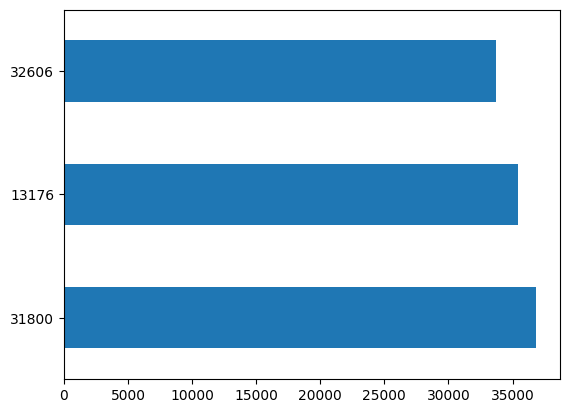

In [ ]:
train["donor"].value_counts().plot(kind="barh")

<Axes: ylabel='cell_type'>

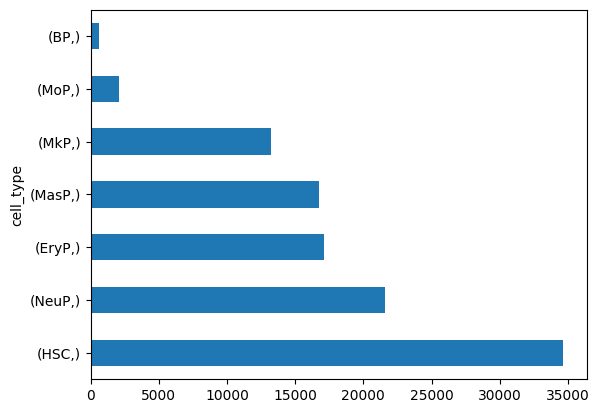

In [ ]:
y.value_counts().plot(kind="barh")

## Data Preprocessing

In [ ]:
def label_processing(y):
  le = LabelEncoder()
  y = le.fit_transform(y.iloc[:,0])
  y = pd.DataFrame(y)
  return y.values.ravel()

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=11000)

In [ ]:
def perform_pca(data):
    normalized_data = scaler.fit_transform(data)
    pca_data = pca.fit_transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(11000)])
    return pca_df

In [ ]:
def perform_pca_test(data):
    normalized_data = scaler.transform(data)
    pca_data = pca.transform(normalized_data)
    pca_df = pd.DataFrame(pca_data, columns=["PC{}".format(i+1) for i in range(11000)])
    return pca_df

In [ ]:
X1 = X.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=0)

In [ ]:
start_time = time.time()
X_train = perform_pca(X_train)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 1089.1323220729828


In [ ]:
start_time = time.time()
X_test = perform_pca_test(X_test)
end_time = time.time()
print("Time taken:", end_time-start_time)

Time taken: 36.510008573532104


In [ ]:
y_train = label_processing(y_train)
y_test = label_processing(y_test)

In [ ]:
X_train.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC10991,PC10992,PC10993,PC10994,PC10995,PC10996,PC10997,PC10998,PC10999,PC11000
0,4.554330,-8.450035,-4.682525,1.291402,-9.975676,0.409788,-6.900759,-3.191146,6.241737,-5.660756,...,-0.072011,-2.737638,1.364138,-0.411220,1.498051,-0.720826,-0.066132,-1.941146,0.457998,-0.205159
1,-3.712702,-9.562130,16.471092,9.893347,-19.477434,-9.951736,-4.664715,13.460083,-9.716234,5.354332,...,0.076054,-0.016383,-0.662492,-1.167433,0.175216,-1.340042,0.147542,0.774744,0.866569,-1.351399
2,5.348698,-16.999849,-5.242604,0.201658,5.652137,-10.352400,-1.383791,3.557956,-4.390215,3.138250,...,-0.625344,-1.258803,0.880873,-1.655928,0.427703,0.490374,0.032053,0.309908,-0.283053,1.619702
3,-38.685135,-16.862989,-5.164387,3.510489,17.570879,1.398893,12.801683,17.198584,3.702374,-5.816940,...,0.147314,-0.503550,-0.839677,-1.223159,0.601417,-0.494134,-0.621151,-0.124685,-0.858419,-0.441654
4,5.656418,23.969389,-7.224728,-3.741012,0.939440,-1.306295,5.496114,0.168542,-0.209811,-2.719493,...,0.445864,0.329474,0.691218,0.485487,0.040259,0.260149,1.553174,-1.830884,0.100166,0.682156


In [ ]:
X_test.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC10991,PC10992,PC10993,PC10994,PC10995,PC10996,PC10997,PC10998,PC10999,PC11000
0,11.794018,-0.626433,-6.681753,-7.903235,-3.049241,-10.753701,3.244961,-5.319603,-1.563864,8.157243,...,0.705129,1.290921,-0.418130,1.738924,1.265111,0.789703,-0.412574,-0.761746,-0.346143,-0.302066
1,4.682234,5.292640,-9.767590,4.837337,5.328143,2.290727,-9.181624,3.269635,1.823098,0.917408,...,0.960976,-0.021747,0.060747,-0.614707,-0.911616,-0.249327,0.502527,0.430248,-1.297449,-0.507105
2,-8.954255,27.577904,0.635194,-11.780312,2.740478,-9.876461,6.887691,1.464459,-7.903697,-4.839835,...,0.894347,0.042700,1.343237,0.055678,-0.486936,-0.938365,0.871867,-0.313902,-0.813320,1.456717
3,-7.363942,-19.784281,-12.297845,2.048958,-5.484781,-3.922880,5.009192,-5.738688,6.727841,4.806518,...,-1.322213,-1.164367,2.322270,0.955567,1.588910,0.302851,0.656473,-0.629071,-0.410185,3.060621
4,-27.844820,23.490730,12.042846,-6.385059,2.650007,0.895980,7.704250,-0.173789,-6.903357,-0.719814,...,1.683836,-0.138874,0.829549,-0.819028,0.263965,0.837679,-0.166795,0.935354,0.659980,-0.208859


In [ ]:
y_train

array([3, 1, 6, ..., 2, 6, 6])

In [ ]:
y_test

array([6, 2, 2, ..., 6, 2, 1])

#### PCA Visualization

<Axes: xlabel='PC1', ylabel='PC2'>

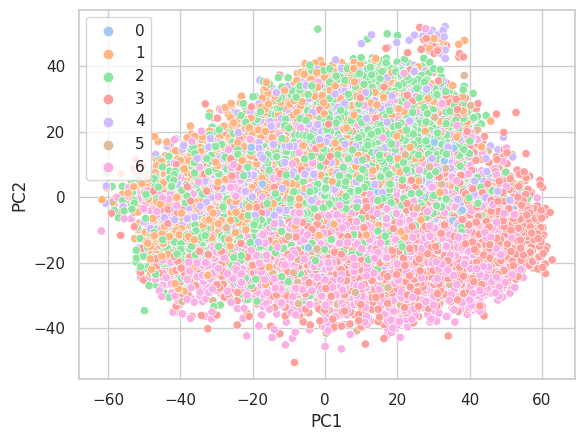

In [ ]:
#pca=11000
sns.set(style="whitegrid")
fig, ax = plt.subplots()
sns.scatterplot(data=X_train, x="PC1", y="PC2", hue=y_train, palette="pastel")

In [ ]:
fig = px.scatter_3d(X_train, x="PC1", y="PC2", z="PC3", color=y_train, color_continuous_scale='GnBu')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Model

#### Random Forest

In [ ]:
start_time = time.time()
rf = RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=2000, oob_score=True)
rf.fit(X_train, y_train)
end_time = time.time()
print("Time Taken:", end_time - start_time)

Time Taken: 4110.440555095673


In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7985699789980414


#### KMeans

In [ ]:
start_time = time.time()
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto")
kmeans.fit(X_train)
end_time = time.time()
print("Time Taken:", end_time - start_time)

Time Taken: 16.948405981063843


In [ ]:
y_pred = kmeans.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.11626589895462161


#### Decision Tree

In [ ]:
start_time = time.time()
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
end_time = time.time()
print("Time Taken:", end_time - start_time)

Time Taken: 3974.486878156662


In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8076786936309791


#### XGB Classifier

In [ ]:
start_time = time.time()
xgb_model = XGBClassifier().fit(X_train, y_train)
end_time = time.time()
print("Time Taken:", end_time - start_time)

Time Taken: 14715.791033267975


In [ ]:
y_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8927012294404983
